# Jupyter Dashboard

## 1. Data visualisation

### 1.1 data/raw/

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
plt.rcParams["figure.dpi"] = 120
from scipy.optimize import minimize
import numpy as np
from src.opera.mixture import Mixture

In [3]:
df = pd.read_csv('data/raw/ELIA.csv', sep=';', on_bad_lines='skip')
df.head()

,Datetime,Resolution code,Offshore/onshore,Region,Grid connection type,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2025-12-01T23:45:00+01:00,PT15M,Onshore,Flanders,Dso,1580.94,1413.1,1378.5,1433.1,1333.6,...,1369.9,1382.9,1328.4,1414.2,111.8,58.4,145.1,1700.58,0.93,''
1,2025-12-01T23:45:00+01:00,PT15M,Onshore,Flanders,Elia,220.23,178.0,144.0,197.9,174.6,...,203.3,176.2,123.6,205.8,132.0,75.1,162.0,333.40,0.66,''
2,2025-12-01T23:45:00+01:00,PT15M,Onshore,Wallonia,Dso,965.72,972.1,807.6,1066.4,923.8,...,1044.6,933.1,755.1,1043.4,340.9,115.0,417.4,1353.77,0.71,''
3,2025-12-01T23:45:00+01:00,PT15M,Offshore,Federal,Elia,2185.50,2171.9,2136.8,2242.7,2174.5,...,2255.6,2173.5,2076.5,2253.2,2121.7,425.4,2150.4,2262.10,0.97,''
4,2025-12-01T23:45:00+01:00,PT15M,Onshore,Wallonia,Elia,118.47,115.8,99.6,136.3,109.8,...,144.0,108.7,84.1,139.6,72.3,31.4,79.0,188.20,0.63,''


In [4]:
df = pd.read_csv('data/raw/MTO_BELGIQUE_18_to_25.csv')
df.head()

,valid_time,u100,v100,u10,v10,t2m,msl,sst,sp,latitude,longitude
0,2018-01-01 00:00:00,17.891388,12.289810,13.044540,9.531647,281.30188,99547.310,280.7588,99568.836,51.5,3.0
1,2018-01-01 01:00:00,19.008880,7.765930,14.131149,6.141098,281.37300,99638.310,280.7588,99659.280,51.5,3.0
2,2018-01-01 02:00:00,17.849350,5.749756,13.414413,4.661072,281.32764,99812.190,280.7588,99833.780,51.5,3.0
3,2018-01-01 03:00:00,16.603897,4.897415,12.725754,3.991196,281.15686,99922.060,280.7588,99943.300,51.5,3.0
4,2018-01-01 04:00:00,14.488632,5.378235,11.158417,4.428650,280.96695,99985.375,280.7588,100007.720,51.5,3.0


### 1.2 data/cleaned/
*Goes from 2018-01-01 00:00:00 to 2025-11-23 23:00:00, computed in H1 so across 2871 days (so 68,904 lines)*

In [5]:
df = pd.read_csv('data/cleaned/data_cleaned_Belgique.csv')
df.head()

,Date_Heure,Eolien_MW,Offshore/onshore,Region,speed_longitudinale_100m,speed_latitudinale_100m,speed_longitudinale_10m,speed_latitudinale_10m,2m_temperature,mean_sea_level_pressure,sea_surface_temperature,surface_pressure
0,2018-01-01 00:00:00,821.80,Offshore,Federal,17.891388,12.289810,13.044540,9.531647,281.30188,99547.310,280.7588,99568.836
1,2018-01-01 01:00:00,812.10,Offshore,Federal,19.008880,7.765930,14.131149,6.141098,281.37300,99638.310,280.7588,99659.280
2,2018-01-01 02:00:00,812.10,Offshore,Federal,17.849350,5.749756,13.414413,4.661072,281.32764,99812.190,280.7588,99833.780
3,2018-01-01 03:00:00,809.06,Offshore,Federal,16.603897,4.897415,12.725754,3.991196,281.15686,99922.060,280.7588,99943.300
4,2018-01-01 04:00:00,802.93,Offshore,Federal,14.488632,5.378235,11.158417,4.428650,280.96695,99985.375,280.7588,100007.720


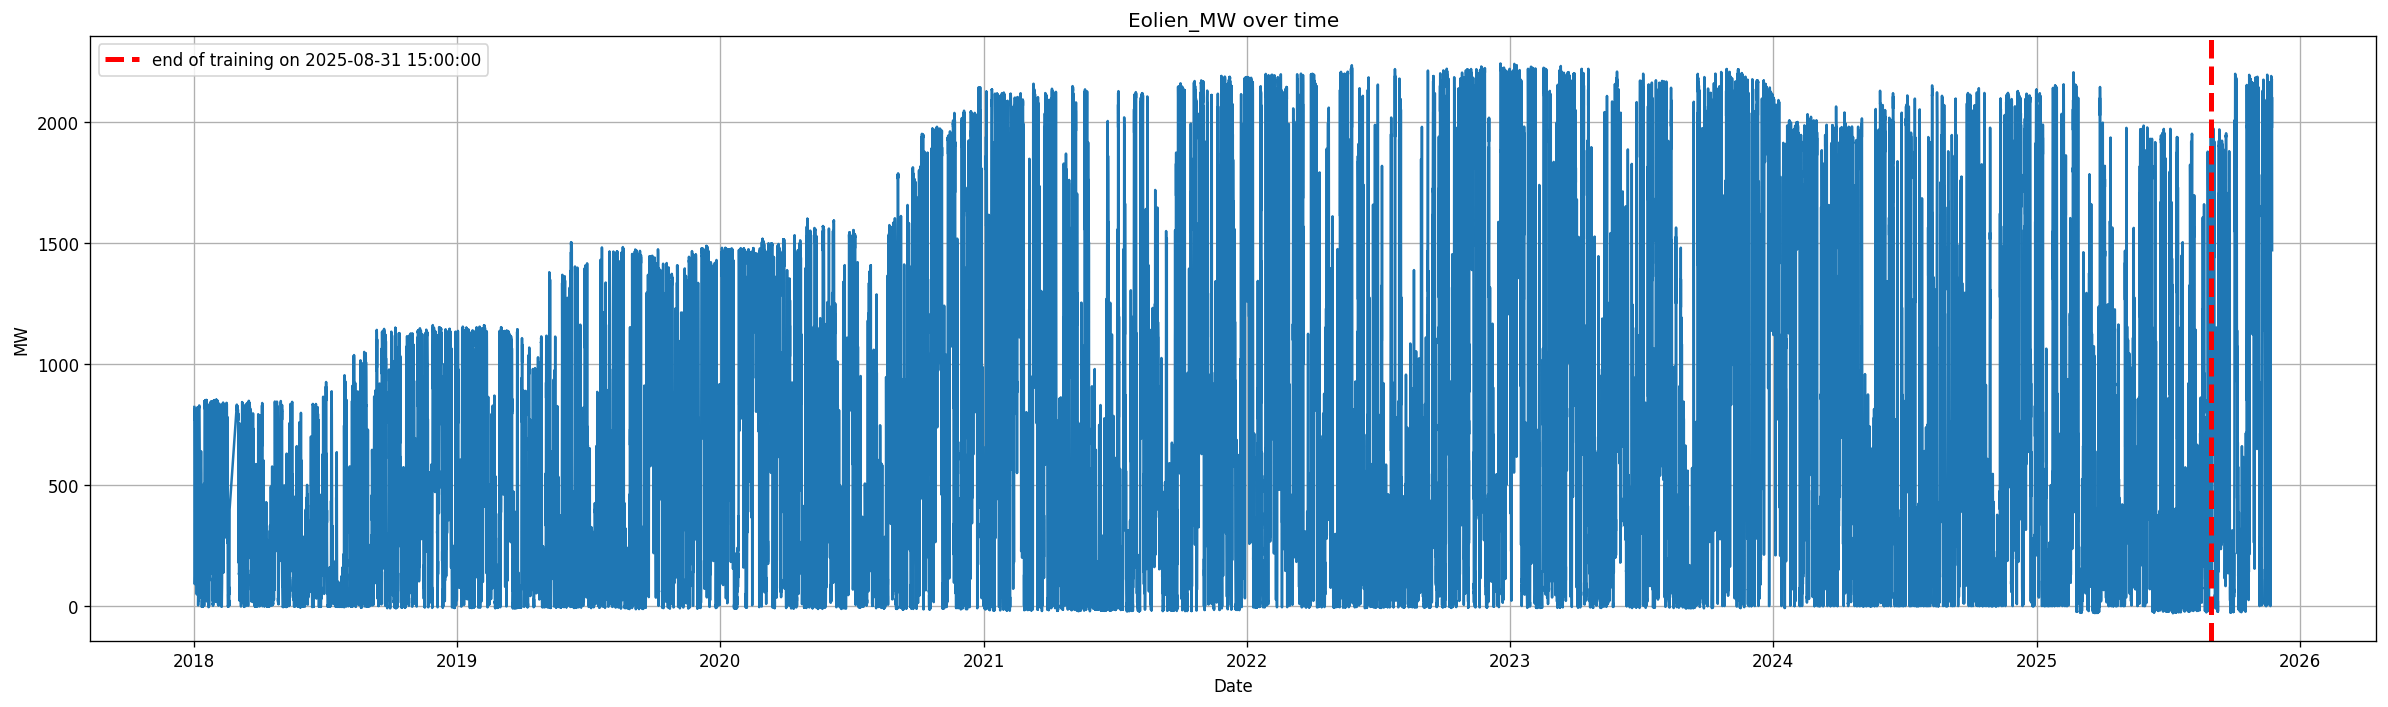

In [ ]:
df["Date_Heure"] = pd.to_datetime(df["Date_Heure"])
plt.figure(figsize=(20, 6))
plt.plot(df["Date_Heure"], df["Eolien_MW"])
plt.axvline(pd.Timestamp("2025-08-31 15:00:00"), color='red', linestyle='--', linewidth=3, label='end of training on 2025-08-31 15:00:00')
plt.title("Eolien_MW over the time")
plt.xlabel("Date")
plt.ylabel("MW")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 1.3 data/output1/
Generated by train/test/val 3 predictive models, using past data + using meteo prevision (but weighted how ? could be interesting to give 70% weights for each model to the prevision as a common basis, and 30% to the historical prediction to create inference) determine exactly how it is done, by bloc ? Maybe try different ones, but curently , E1 : RIDGE , E2 ; LGBM , E3 :  ElasticNet. Has the prediciton been truncated ? Or only generated for this window ? Because predicition window makes part of data trained ? Logically the traineing shoukd have been finished on 2025-08-31 15:00:00 to be confirmed.

*Goes from 2025-08-31 16:00:00 to 2025-11-22 23:00:00, computed in H1 so across 83.3 days (2,000 lines)*

In [23]:
df = pd.read_csv('data/output1/expertsvs2.csv')
df.head()

,issue_datetime,target_datetime,y_true,randomforest,lgbm,elasticnet
0,2025-02-24 10:00:00,2025-02-25 00:00:00,1200.02,976.451723,891.117925,734.758456
1,2025-02-24 10:00:00,2025-02-25 01:00:00,1006.85,941.197065,911.978898,701.246070
2,2025-02-24 10:00:00,2025-02-25 02:00:00,858.66,740.090806,753.898420,569.773905
3,2025-02-24 10:00:00,2025-02-25 03:00:00,375.19,506.299015,448.740156,380.978499
4,2025-02-24 10:00:00,2025-02-25 04:00:00,402.54,221.476538,231.361646,148.578698


In [25]:
import os

# récupérer les deux derniers issue_datetime distincts
last_issues = (
    df["issue_datetime"]
    .drop_duplicates()
    .sort_values()
    .tail(2)
    .tolist()
)

df_last_48 = (
    df[df["issue_datetime"].isin(last_issues)]
    .sort_values(["issue_datetime", "target_datetime"])
    .reset_index(drop=True)
)

# output
out_dir = "data/output2"
os.makedirs(out_dir, exist_ok=True)

out_path = os.path.join(out_dir, "Last48h_Prediction_Vectors.csv")

df_last_48.to_csv(out_path, index=False)

print("Saved last 2 day-ahead prediction vectors:")
for issue in last_issues:
    print(f" - issue @ {issue}")
print(f"→ {out_path}")


Saved last 90 day-ahead vectors:
 - runs (issue_datetime) = 90
 - rows = 2160 (should be ~ 2160)
→ data/output2\Last90Vectors_DayAhead.csv


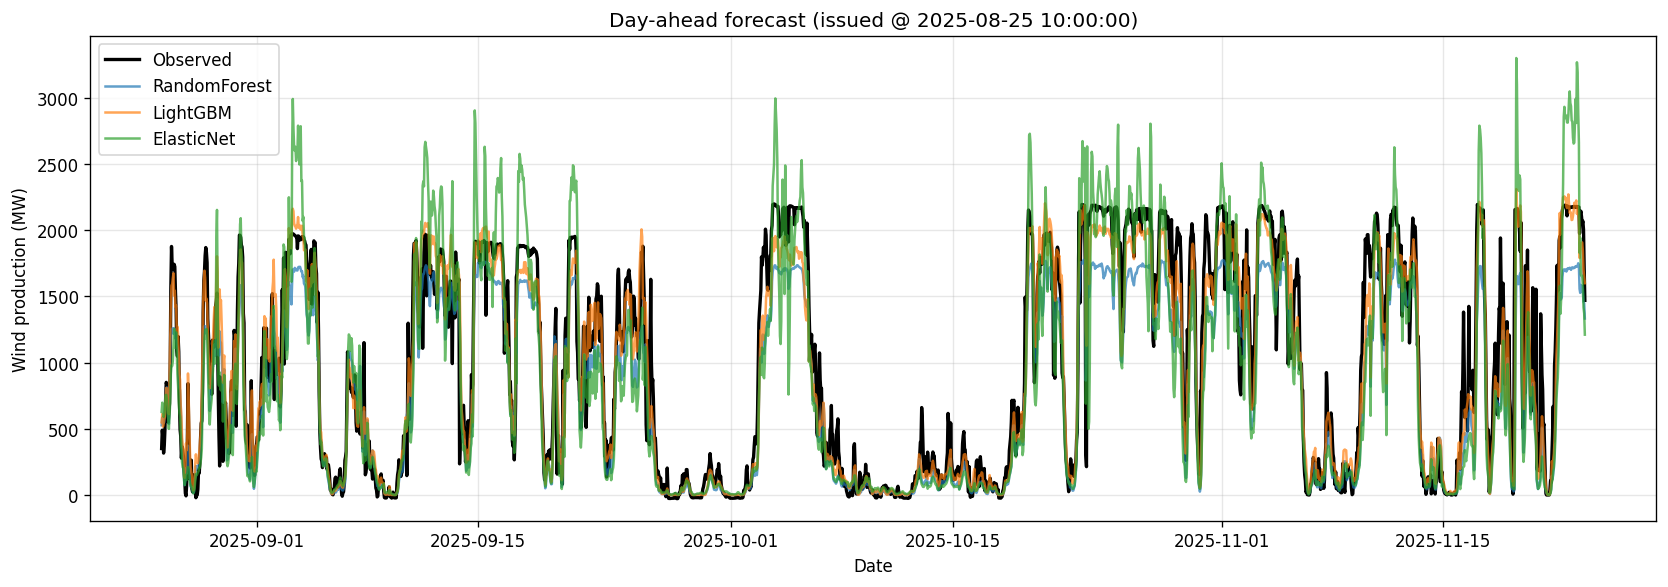

In [27]:
df = pd.read_csv(
    "data/output2/Last90Vectors_DayAhead.csv",
    parse_dates=["issue_datetime", "target_datetime"]
).sort_values("target_datetime")

issue_dt = df["issue_datetime"].iloc[0]

plt.figure(figsize=(14, 5))

plt.plot(df["target_datetime"], df["y_true"], label="Observed", color="black", linewidth=2)
plt.plot(df["target_datetime"], df["randomforest"], label="RandomForest", alpha=0.7)
plt.plot(df["target_datetime"], df["lgbm"], label="LightGBM", alpha=0.7)
plt.plot(df["target_datetime"], df["elasticnet"], label="ElasticNet", alpha=0.7)

plt.title(f"Day-ahead forecast (issued @ {issue_dt})")
plt.xlabel("Date")
plt.ylabel("Wind production (MW)")
plt.grid(True, alpha=0.3)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

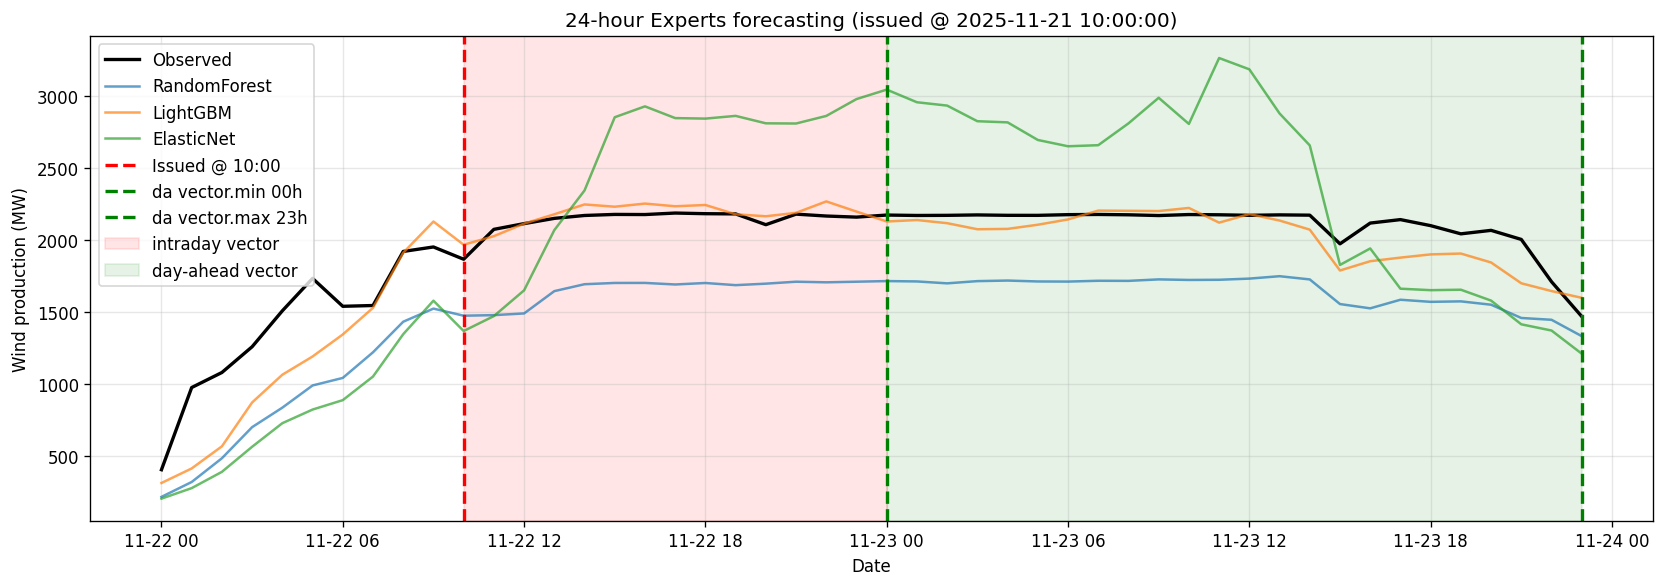

In [43]:
df = pd.read_csv(
    "data/output2/Last48h_Prediction_Vectors.csv",
    parse_dates=["issue_datetime", "target_datetime"]
).sort_values("target_datetime")

issue_dt = df["issue_datetime"].iloc[0]

plt.figure(figsize=(14, 5))

plt.plot(df["target_datetime"], df["y_true"], label="Observed", color="black", linewidth=2)
plt.plot(df["target_datetime"], df["randomforest"], label="RandomForest", alpha=0.7)
plt.plot(df["target_datetime"], df["lgbm"], label="LightGBM", alpha=0.7)
plt.plot(df["target_datetime"], df["elasticnet"], label="ElasticNet", alpha=0.7)

plt.axvline(pd.Timestamp("2025-11-22 10:00:00"), color='red', linestyle='--', linewidth=2, label='Issued @ 10:00')
plt.axvline(pd.Timestamp("2025-11-23 00:00:00"), color='green', linestyle='--', linewidth=2, label='da vector.min 00h')
plt.axvline(pd.Timestamp("2025-11-23 23:00:00"), color='green', linestyle='--', linewidth=2, label='da vector.max 23h')

plt.axvspan(pd.Timestamp("2025-11-22 10:00:00"), pd.Timestamp("2025-11-23 00:00:00"), color='red', alpha=0.1, label='intraday vector')
plt.axvspan(pd.Timestamp("2025-11-23 00:00:00"), pd.Timestamp("2025-11-23 23:00:00"), color='green', alpha=0.1, label='day-ahead vector')

plt.title(f"24-hour Experts forecasting (issued @ {issue_dt})")
plt.xlabel("Date")
plt.ylabel("Wind production (MW)")
plt.grid(True, alpha=0.3)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### 1.4 data/output2/

Has this dataset been calculated as the previous prediction like the following but hidden for the test ? To confirm

*Prediction of the 24 hours post-cut values by expert*

In [ ]:
df = pd.read_csv('data/output2/pred_24h.csv')
df.head(24)

,Date_Heure,y_true,randomforest,lgbm,elasticnet
0,2025-11-23 00:00:00,2174.19,1775.841557,2112.718640,3122.131031
1,2025-11-23 01:00:00,2171.31,1779.595591,2145.224870,3137.213202
2,2025-11-23 02:00:00,2172.17,1764.705638,2099.770666,3112.427897
3,2025-11-23 03:00:00,2175.08,1747.449618,2081.252067,2993.434988
4,2025-11-23 04:00:00,2172.28,1741.429559,2190.832170,2985.842597
5,2025-11-23 05:00:00,2172.06,1744.381976,2169.514384,2854.740383
6,2025-11-23 06:00:00,2176.97,1742.295320,2158.775481,2808.869149
7,2025-11-23 07:00:00,2178.34,1740.566461,2160.822517,2818.004003
8,2025-11-23 08:00:00,2175.95,1748.665197,2170.229938,2974.950249
9,2025-11-23 09:00:00,2170.76,1731.190122,2171.090789,3154.207832


# 2. Opera Module

In [ ]:
# =========================
# 0) CONFIG
# =========================

#We put all avaible predicitons from experts in the training set, so train should also not be changed, we eventually can change the frequency of plotting like grouping by day or 2-day
#It should remains same results (same window but different frequency of data points, only the shape will be less detailed)

TRAIN_START = "2025-02-04 08:00:00"     # Can be changed for experiments
TRAIN_END   = "2025-11-22 23:00:00"     # Do not touch, fixed

# =========================
# 1) Load + clean train
# =========================
df_train = pd.read_csv("data/output1/experts.csv")          # H1 data
df_train["Date_Heure"] = pd.to_datetime(df_train["Date_Heure"], errors="coerce")

cols = ["y_true", "randomforest", "lgbm", "elasticnet"]
for c in cols:
    df_train[c] = pd.to_numeric(df_train[c], errors="coerce")

df_train = (
    df_train.dropna(subset=["Date_Heure"] + cols)
            .sort_values("Date_Heure")
)

# training window
start_dt = pd.to_datetime(TRAIN_START)
end_dt   = pd.to_datetime(TRAIN_END)

df_train_win = df_train[
    (df_train["Date_Heure"] >= start_dt) &
    (df_train["Date_Heure"] <= end_dt)
].copy()

if df_train_win.empty:
    raise ValueError("Fenêtre d'entraînement vide : vérifie TRAIN_START / TRAIN_END.")

y_train = df_train_win["y_true"]
X_train = df_train_win[["randomforest", "lgbm", "elasticnet"]]
awake_train = np.ones(X_train.shape)

# =========================
# 2) Fit OPERA (FTRL, BOA, MLprod, MLpol) and its related parameters
# =========================
mod = Mixture(
    y=y_train,
    experts=X_train,
    awake=awake_train,
    model="FTRL",
    loss_type="mse",
    loss_gradient=True,
    parameters={
        "constraints": [
        {"type":"eq", "fun": lambda w: np.sum(w)-1},
        {"type":"ineq", "fun": lambda w: w},
        ],
        "options": {"maxiter": 200},
    }
    )

print("Train window:", df_train_win["Date_Heure"].iloc[0], "→", df_train_win["Date_Heure"].iloc[-1])
print("Last weights:", mod.w, "sum =", mod.w.sum())

# =========================
# 3) Load + predict 24h block
# =========================
df_24 = pd.read_csv("data/output2/pred_24h.csv")
df_24["Date_Heure"] = pd.to_datetime(df_24["Date_Heure"], errors="coerce")

for c in cols:
    df_24[c] = pd.to_numeric(df_24[c], errors="coerce")

df_24 = (
    df_24.dropna(subset=["Date_Heure"] + cols)
        .sort_values("Date_Heure")
)

X_24 = df_24[["randomforest", "lgbm", "elasticnet"]]
y_24 = df_24["y_true"].to_numpy()

print("First timestamp 24h:", df_24["Date_Heure"].iloc[0])
print("Last  timestamp 24h:", df_24["Date_Heure"].iloc[-1])

# --- Predict 24h with frozen weights ---
y_hat_24 = mod.predict(X_24).reshape(-1)

df_out = df_24[["Date_Heure", "y_true", "randomforest", "lgbm", "elasticnet"]].copy()
df_out["moe"] = y_hat_24
df_out.to_csv("data/output2/moe_24h.csv", index=False)

print("Saved:", "data/output2/moe_24h.csv")

# =========================
# 4) Metrics (saved to CSV)
# =========================

def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat) ** 2))

def mae(y, yhat):
    return np.mean(np.abs(y - yhat))

def r2(y, yhat):
    ss_res = np.sum((y - yhat) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1.0 - ss_res / ss_tot


metrics = []

# ElasticNet
metrics.append({
    "model": "elasticnet",
    "RMSE": rmse(y_24, df_out["elasticnet"].values),
    "MAE":  mae(y_24, df_out["elasticnet"].values),
    "R2":   r2(y_24, df_out["elasticnet"].values),
})

# MOE
metrics.append({
    "model": "moe",
    "RMSE": rmse(y_24, y_hat_24),
    "MAE":  mae(y_24, y_hat_24),
    "R2":   r2(y_24, y_hat_24),
})

# Uniform average
y_uniform = df_out[["randomforest", "lgbm", "elasticnet"]].mean(axis=1).values
metrics.append({
    "model": "uniform",
    "RMSE": rmse(y_24, y_uniform),
    "MAE":  mae(y_24, y_uniform),
    "R2":   r2(y_24, y_uniform),
})

# LGBM
metrics.append({
    "model": "lgbm",
    "RMSE": rmse(y_24, df_out["lgbm"].values),
    "MAE":  mae(y_24, df_out["lgbm"].values),
    "R2":   r2(y_24, df_out["lgbm"].values),
})

# RandomForest
metrics.append({
    "model": "randomforest",
    "RMSE": rmse(y_24, df_out["randomforest"].values),
    "MAE":  mae(y_24, df_out["randomforest"].values),
    "R2":   r2(y_24, df_out["randomforest"].values),
})


# Save 
df_metrics = (
    pd.DataFrame(metrics)
      .set_index("model")
      .round(6)
)

out_path = "data/output1/experts_and_moe_metrics24h.csv"
df_metrics.to_csv(out_path)

print("Saved metrics to:", out_path)

Train window: 2025-02-04 08:00:00 → 2025-11-22 23:00:00
Last weights: [0.21201585 0.68803197 0.09995218] sum = 1.0
First timestamp 24h: 2025-11-23 00:00:00
Last  timestamp 24h: 2025-11-23 23:00:00
Saved: data/output2/moe_24h.csv
Saved metrics to: data/output1/experts_and_moe_metrics24h.csv


In [ ]:
df = pd.read_csv('data/output2/moe_24h.csv')
df.head()

,Date_Heure,y_true,randomforest,lgbm,elasticnet,moe
0,2025-11-23 00:00:00,2174.19,1775.841557,2112.718640,3122.131031,2142.188324
1,2025-11-23 01:00:00,2171.31,1779.595591,2145.224870,3137.213202,2166.857059
2,2025-11-23 02:00:00,2172.17,1764.705638,2099.770666,3112.427897,2129.948863
3,2025-11-23 03:00:00,2175.08,1747.449618,2081.252067,2993.434988,2101.655325
4,2025-11-23 04:00:00,2172.28,1741.429559,2190.832170,2985.842597,2175.014715


*Weights obtained by MoE are input to plot it, but same weight combination for each of its 24 points*

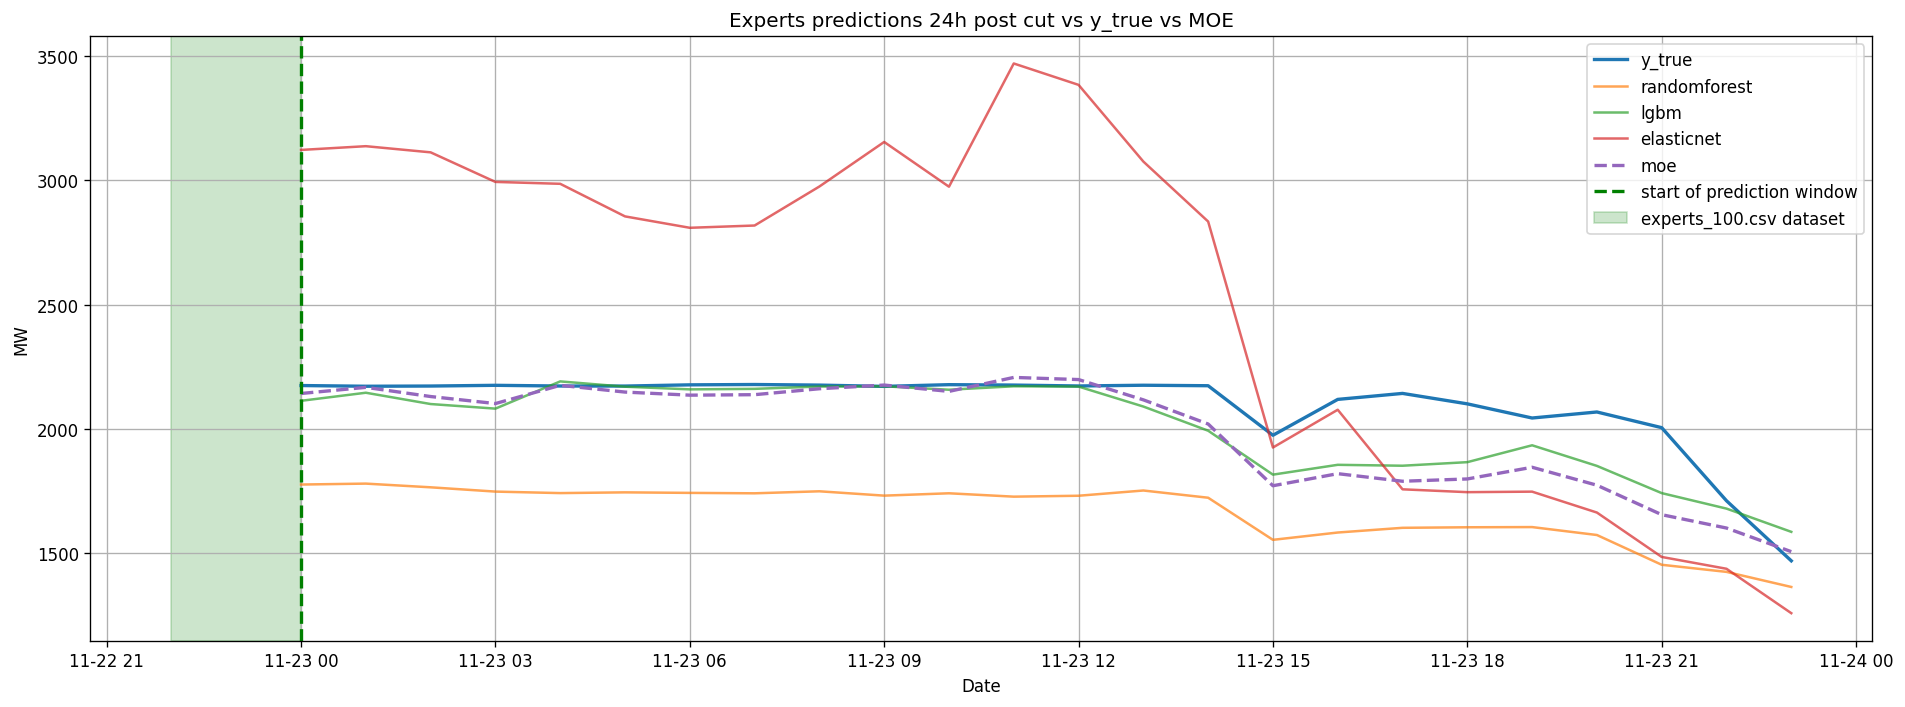

In [ ]:
df["Date_Heure"] = pd.to_datetime(df["Date_Heure"])
plt.figure(figsize=(16, 6))
plt.plot(df["Date_Heure"], df["y_true"], label="y_true", linewidth=2)
plt.plot(df["Date_Heure"], df["randomforest"], label="randomforest", alpha=0.7)
plt.plot(df["Date_Heure"], df["lgbm"], label="lgbm", alpha=0.7)
plt.plot(df["Date_Heure"], df["elasticnet"], label="elasticnet", alpha=0.7)
plt.plot(df["Date_Heure"], df["moe"], label="moe", linewidth=2, linestyle="--")
plt.axvline(pd.Timestamp("2025-11-23 00:00:00"), color='green', linestyle='--', linewidth=2, label='start of prediction window')
plt.axvspan(pd.Timestamp("2025-11-22 22:00:00"), pd.Timestamp("2025-11-23 00:00:00"), color='green', alpha=0.2, label='experts_100.csv dataset')
plt.title("Experts predictions 24h post cut vs y_true vs MOE")
plt.xlabel("Date")
plt.ylabel("MW")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('data/output1/experts_and_moe_metrics24h.csv')
df.head()

,model,RMSE,MAE,R2
0,elasticnet,732.306977,650.941913,-18.411585
1,moe,164.674144,113.542743,0.018420
2,uniform,225.868046,193.712356,-0.846649
3,lgbm,134.961594,95.677607,0.340682
4,randomforest,437.507402,428.976654,-5.928600


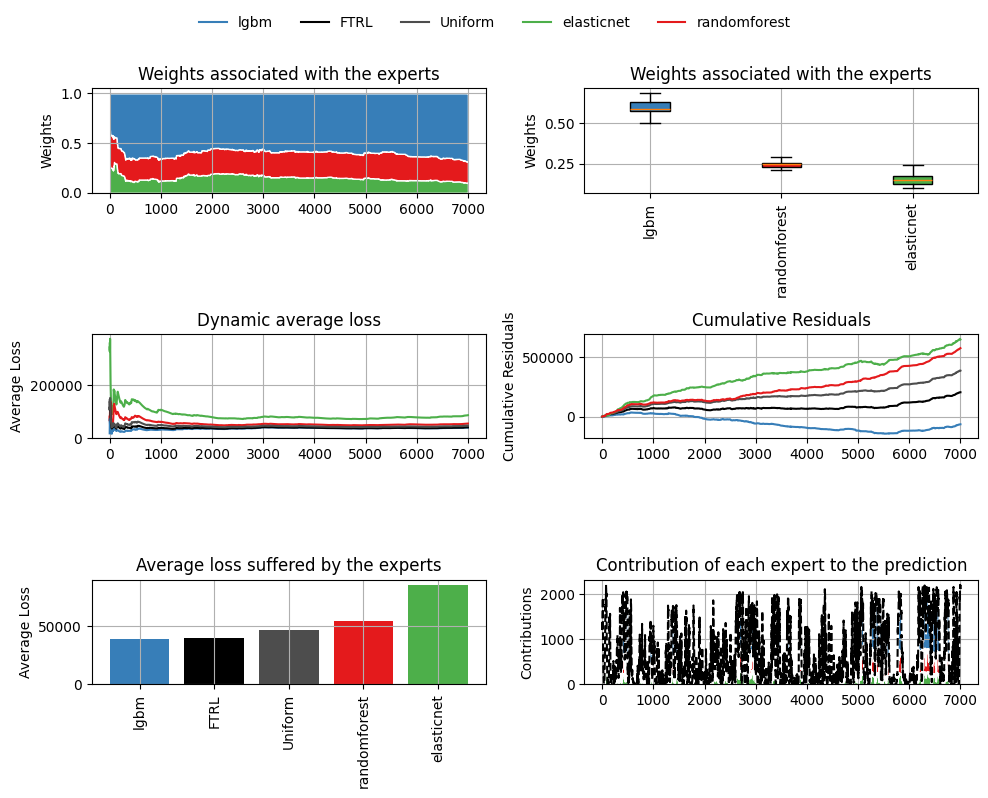

In [ ]:
K = X_train.shape[1]
colors = sns.color_palette("Set1", K + 2)  

mod.plot_mixture(plot_type="all", colors=colors)